In [16]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [17]:
fs = 1.e4
N = 1e6
amp = 2*np.sqrt(2)
freq = [1000.0, 2000., 4000.]
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq[0]*time) + amp*np.sin(2*np.pi*freq[1]*time) + amp*np.sin(2*np.pi*freq[2]*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

In [18]:
N  = 5    # Filter order
Wn = np.array([1500., 2500])/(fs/2.) # Cutoff frequency
# B, A = signal.butter(N, Wn, btype='highpass', output='ba')
B, A = signal.butter(N, Wn, btype='bandpass', output='ba')

x_f = signal.filtfilt(B,A, x)

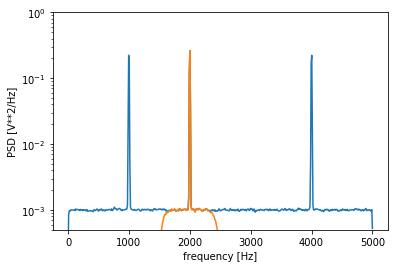

In [19]:
plt.figure()

f, Pxx_den = signal.welch(x, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)

f, Pxx_den = signal.welch(x_f, fs, nperseg=1024)
plt.semilogy(f, Pxx_den)

plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [20]:
fs

10000.0